In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 15

In [3]:
# ===========================
# 		Usefull paths
# ===========================

# Data folders
data_folder = Path('../Apartado1')
C11_folder = data_folder / 'C11'
N13_folder = data_folder / 'N13'
O15_folder = data_folder / 'O15'
F18_folder = data_folder / 'F18'
Ga68_folder = data_folder / 'Ga68'
Rb82_folder = data_folder / 'Rb82'

# Test
test_folder = Path('../PET-resultados')

# Plots output folder
figures_folder = Path('Figures')

# ===========================

# Energy file name
energy_file = 'ini-ene.his'

# Output folder (text files)
output_folder = Path('Outputs')

In [4]:
def read_his(path, sep, skiprows, col_names):
	return pd.read_csv(path, sep=sep, skiprows=skiprows, names=col_names)

In [5]:
def plot_ene_his(*datas, labels, colors, title, xlabel, ylabel, save=False, save_name=None):
	plt.figure(figsize=(10, 6))
	for i, data in enumerate(datas):
		plt.errorbar(data['Energy'], data['Norm.Prob'], yerr=data['Norm.Error'], fmt='None', label=labels[i], color=colors[i], capsize=3)
		plt.plot(data['Energy'], data['Norm.Prob'], color=colors[i])

	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.legend()
	
	
	if save:
		plt.savefig(save_name, format='pdf')

	# plt.show()

In [6]:
def normalize_prob_error(data):
	data['Norm.Prob'] = data['Prob'] / data['Prob'].sum()
	data['Norm.Error'] = data['Error'] / data['Prob'].sum()
	return data

In [13]:
def media_error(data):
	media = (data['Norm.Prob'] * data['Energy']).sum()
	error = np.sqrt(((data['Norm.Error'] * data['Energy'])**2).sum())
	return media, error

In [34]:
def df_media_error(isotopes, means, errors):
	df = pd.DataFrame({'Isótopo': isotopes, 'Media (keV)': means, 'Error (keV)': errors})
	df['Media (keV)'] = df['Media (keV)'].round(0)
	df['Error (keV)'] = df['Error (keV)'].round(0)
	return df

In [39]:
def main():
	col_names = ['Energy', 'Prob', 'Error']
	sep = r'\s+'
	skiprows = 1

	# Read energy files
	C11_energy = read_his(C11_folder / energy_file, sep, skiprows, col_names)
	C11_energy = normalize_prob_error(C11_energy)
	N13_energy = read_his(N13_folder / energy_file, sep, skiprows, col_names)
	N13_energy = normalize_prob_error(N13_energy)
	O15_energy = read_his(O15_folder / energy_file, sep, skiprows, col_names)
	O15_energy = normalize_prob_error(O15_energy)
	F18_energy = read_his(F18_folder / energy_file, sep, skiprows, col_names)
	F18_energy = normalize_prob_error(F18_energy)
	Ga68_energy = read_his(Ga68_folder / energy_file, sep, skiprows, col_names)
	Ga68_energy = normalize_prob_error(Ga68_energy)
	Rb82_energy = read_his(Rb82_folder / energy_file, sep, skiprows, col_names)
	Rb82_energy = normalize_prob_error(Rb82_energy)

	# Plot energy files

	# Params for one plot
	datas = [C11_energy, N13_energy, O15_energy, F18_energy, Ga68_energy, Rb82_energy]
	labels = ['C11', 'N13', 'O15', 'F18', 'Ga68', 'Rb82']
	colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
	save_name = figures_folder / 'espectro_norm_todo.pdf'

	# Calculate mean and error for each isotope
	isotopes = ['$^{11}$C', '$^{13}$N', '$^{15}$O', '$^{18}$F', '$^{68}$Ga', '$^{82}$Rb']
	means = []
	errors = []
	for data in datas:
		mean, error = media_error(data)
		means.append(mean)
		errors.append(error)

	# Save mean and error to a file
	df = df_media_error(isotopes, means, errors)
	df.to_latex(output_folder / 'medias_errores.tex', index=False)
	print(df)

	# Params for 2 plots
	datas1 = [C11_energy, N13_energy, F18_energy]
	labels1 = ['C11', 'N13', 'F18']
	colors1 = ['blue', 'green', 'purple']
	save_name1 = figures_folder / 'espectro_norm1.pdf'
	
	datas2 = [O15_energy, Ga68_energy, Rb82_energy]
	labels2 = ['O15', 'Ga68', 'Rb82']
	colors2 = ['red', 'orange', 'brown']
	save_name2 = figures_folder / 'espectro_norm2.pdf'

	# Common params
	xlabel = 'Energía (keV)'
	ylabel = 'Probabilidad'
	title = 'Espectro de energía para distintos radioisótopos'

	# Save?
	save = False

	# In two plots
	plot_ene_his(*datas1, labels=labels1, colors=colors1, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=save_name1)
	plot_ene_his(*datas2, labels=labels2, colors=colors2, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=save_name2)

	# In one plot
	plot_ene_his(*datas, labels=labels, colors=colors, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=save_name)


     Isótopo  Media (keV)  Error (keV)
0   $^{11}$C        385.0          1.0
1   $^{13}$N        493.0          2.0
2   $^{15}$O        740.0          3.0
3   $^{18}$F        254.0          1.0
4  $^{68}$Ga        838.0          3.0
5  $^{82}$Rb       1536.0          5.0


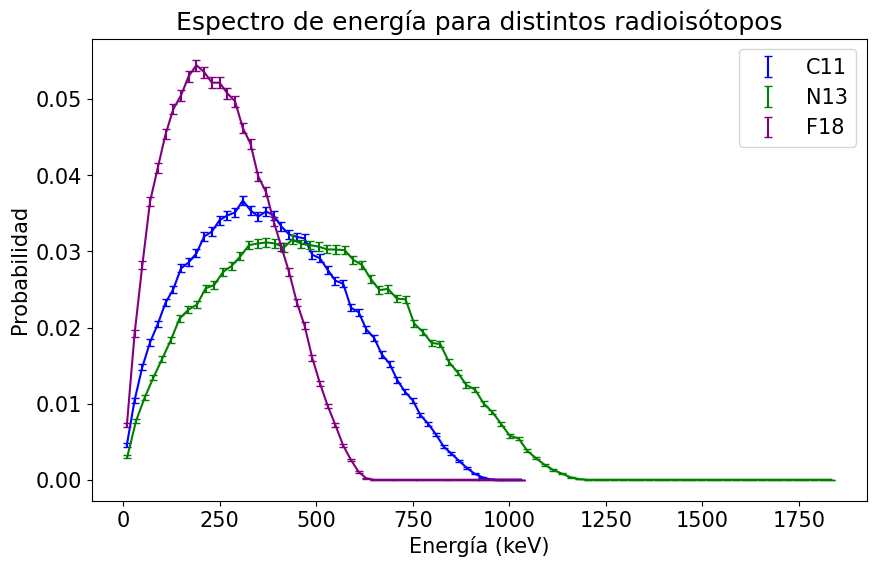

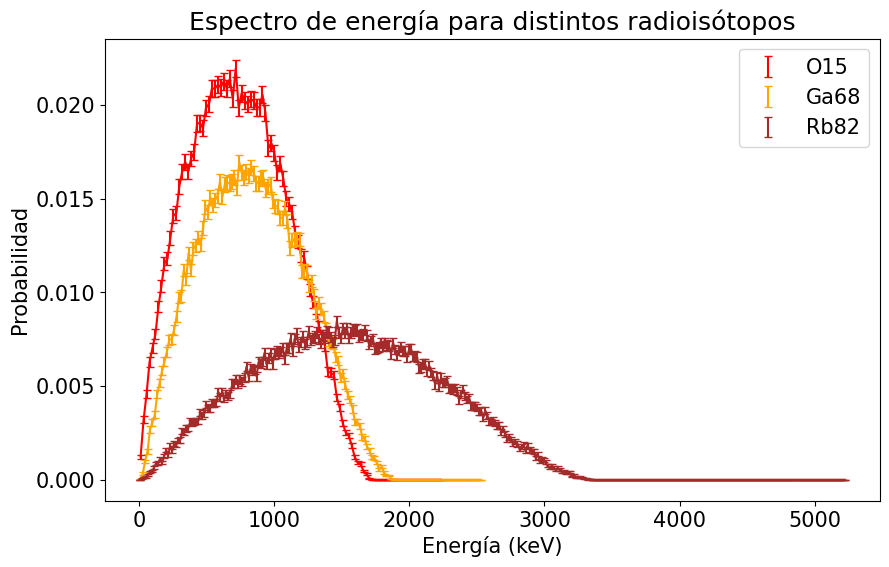

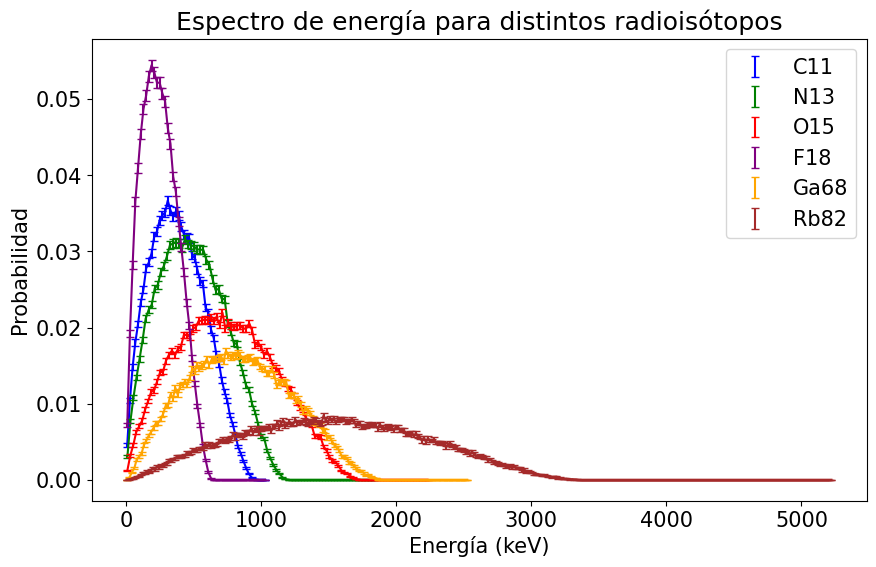

In [40]:
main()